In [1]:
import os
import numpy as np
import tifffile
from natsort import natsorted
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
folder_path = "D:/Temperature_images/RAW_2023-07-13/"  # Specify the path to your folder here
excel_file_path = "D:/Temperature_images/RAW_2023-07-13/Temperatures.xlsx"  # Specify the path to your Excel file here
section_to_delete = "air_satTemp"  # Specify the section you want to delete here

# Read the Excel file and extract the temperature column
df = pd.read_excel(excel_file_path)
temperature_column = df['Temperature'].tolist()

# Get the list of files in the folder and sort them naturally
files = natsorted(os.listdir(folder_path))

# Iterate over the files and rename them
for i, file_name in enumerate(files):
    if file_name.endswith('.tiff'):  # Check if the file has the desired extension
        # Extract the file name and extension
        file_base, file_extension = os.path.splitext(file_name)
        
        # Remove the section to delete from the file name
        new_file_name = file_base.replace(section_to_delete, "")

        # Construct the new file name with the temperature value before the extension
        new_file_name = f"{new_file_name[:15]}{str(temperature_column[i]).replace('.', ',')}{file_extension}"

        # Handle the case when the destination file already exists
        counter = 1
        while os.path.exists(os.path.join(folder_path, new_file_name)):
            # Add a suffix number to the new file name
            new_file_name = f"{file_base}_{counter}{file_extension}"
            counter += 1
        
        # Construct the new file path
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the file
        os.rename(os.path.join(folder_path, file_name), new_file_path)



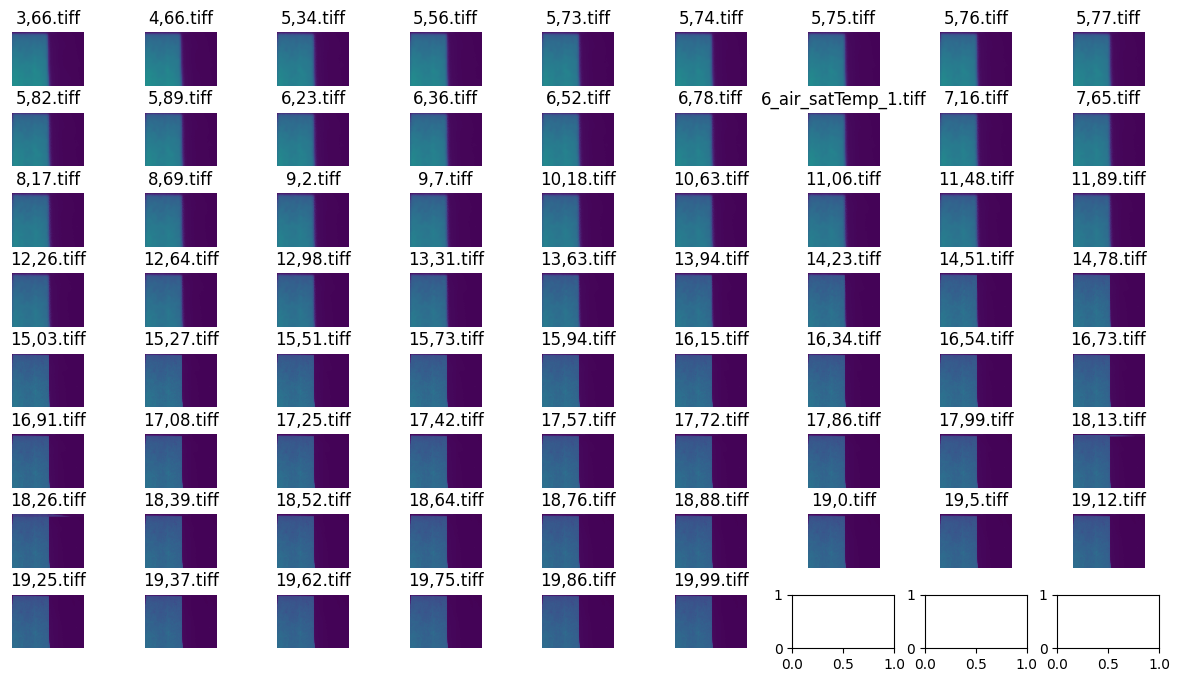

In [4]:
# Set the path to the input directory
input_dir = "D:/Temperature_images/RAW_2023-07-13/"


# Get a list of all image files in the input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.tiff')]
input_files = natsorted(input_files)

# Calculate the number of rows and columns for the grid
num_images = len(input_files)
num_rows = int(num_images**0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Iterate over the image files and display them in the grid
for i, filename in enumerate(input_files):
    # Load the image
    image = tifffile.imread(os.path.join(input_dir, filename))

    # Determine the subplot indices
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the image in the corresponding subplot
    axes[row_idx, col_idx].imshow(image, vmin=256,vmax=4065)
    axes[row_idx, col_idx].set_title(filename[15:])
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the grid of images
plt.show()



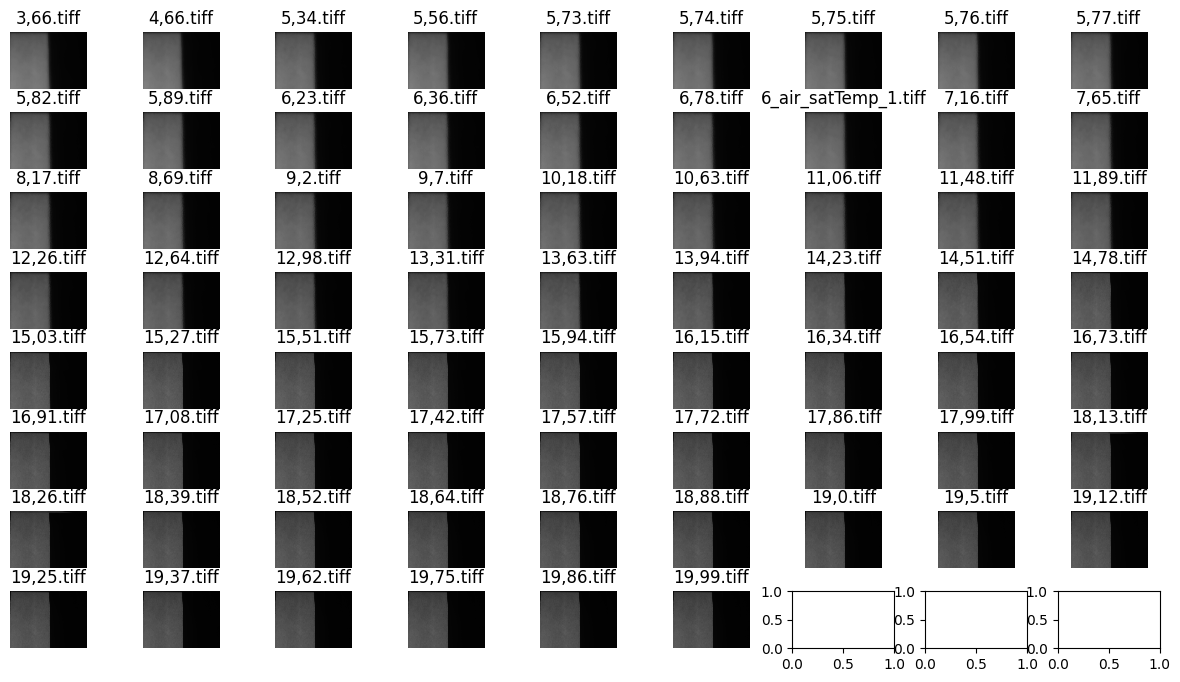

In [5]:
# Define the threshold value
threshold_value = 256

# Create a list to store the thresholded images
thresholded_images = []

# Calculate the number of rows and columns for the grid
num_images = len(input_files)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Iterate over the image files and display them in the grid
for i, filename in enumerate(input_files):
    # Load the image
    image = tifffile.imread(os.path.join(input_dir, filename))

    # Apply the threshold
    thresholded_image = np.where(image > threshold_value, image, 0)
    thresholded_image_nan = np.where(thresholded_image == 0, np.nan, thresholded_image)

    thresholded_images.append(thresholded_image_nan)

    # Determine the subplot indices
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the thresholded image in the corresponding subplot
    axes[row_idx, col_idx].imshow(thresholded_image, cmap='gray', vmin=256,vmax=4065)
    axes[row_idx, col_idx].set_title(filename[15:])
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Display the grid of images
plt.show()


In [7]:
# Set output directory
output_dir = "D:/Temperature_images/RAW_2023-07-13/Threshold_images/"

# Save Thresholded images
for i, filename in enumerate(input_files):
    output_path = os.path.join(output_dir, filename)
    tifffile.imwrite(output_path, thresholded_images[i])

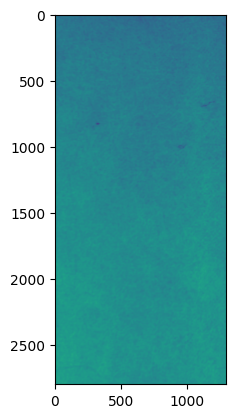

In [10]:
# Set the path to the directory containing the thresholded images
thresholded_dir = 'D:/Temperature_images/RAW_2023-07-13/Threshold_images/'

# Get a list of all thresholded image files in the directory
thresholded_files = [f for f in os.listdir(thresholded_dir) if f.endswith('.tiff')]
thresholded_files = natsorted(thresholded_files)

test_thresholded_image = tifffile.imread(os.path.join(thresholded_dir,thresholded_files[50]))
crop_test_thresholded_image = test_thresholded_image[200:3000,200:1500] 
plt.imshow(crop_test_thresholded_image)

Mean value of red: 1392.3193164835166
Mean value of green: 1854.8979796703297
Mean value of blue: 439.43693406593405
Max value of red: 1802.0
Max value of green: 2429.5
Max value of blue 561.0
Number of red pixels: 910000
Number of green pixels: 910000
Number of blue pixels: 910000


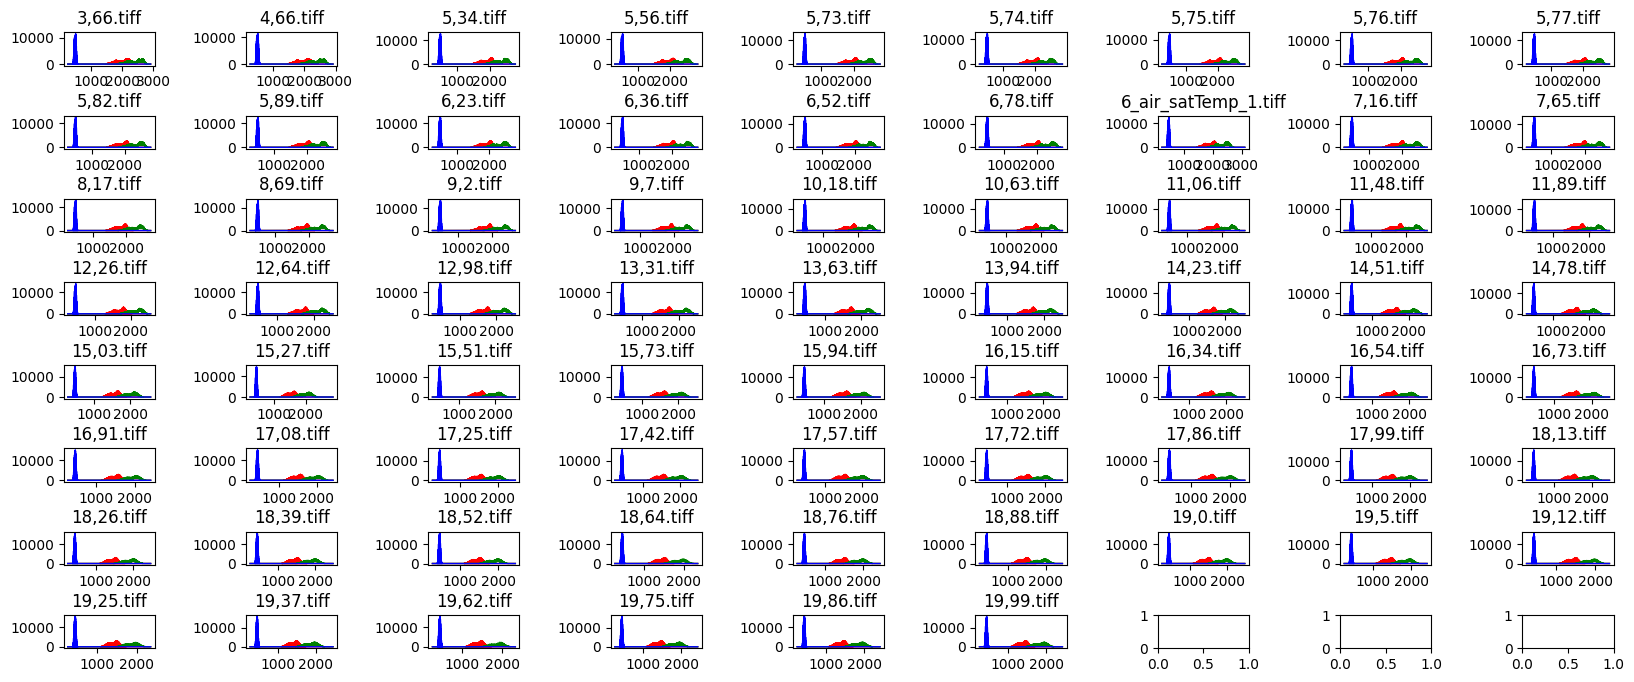

In [13]:
# Calculate the number of rows and columns for the grid
num_images = len(thresholded_files)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

# Iterate over the thresholded image files and display histograms in the grid
for i, filename in enumerate(thresholded_files):
    # Load the thresholded image
    thresholded_image = tifffile.imread(os.path.join(thresholded_dir, filename))

    # Set Crop dimension (OPTIONAL)
    thresholded_image =thresholded_image[200:3000,200:1500]

    # Replace NaN values with 0
    thresholded_image[np.isnan(thresholded_image)] = 0

    # Get the color channels in Bayer order (BGGR)
    red = thresholded_image[1::2, 1::2]
    green1 = thresholded_image[0::2, 1::2]
    green2 = thresholded_image[1::2, 0::2]
    green = np.add(green1, green2) / 2
    blue = thresholded_image[0::2, 0::2]

    # Calculate the minimum and maximum value of the dataset
    min_value_red = np.min(red)
    min_value_green = np.min(green)
    min_value_blue = np.min(blue)
    max_value_red = np.max(red)
    max_value_green = np.max(green)
    max_value_blue = np.max(blue)
    min_value = min(min_value_red, min_value_green, min_value_blue)
    max_value = max(max_value_red, max_value_green, max_value_blue)

   # Calculate and plot the histograms for each color channel
    if np.isfinite(min_value) and np.isfinite(max_value):
        histogram, bin_edges = np.histogram(red, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='red', linewidth=1)

        histogram, bin_edges = np.histogram(green, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='green', linewidth=1)

        histogram, bin_edges = np.histogram(blue, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='blue', linewidth=1)

    # Set the title of the subplot as the filename
    axes[i // num_cols, i % num_cols].set_title(filename[15:])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1.5, wspace=1)

# Display the grid of histograms and show key values

#Get mean of pixel intensities for each channel
mean_red = np.mean(red)
mean_green = np.mean(green)
mean_blue = np.mean(blue)
print("Mean value of red:", mean_red)
print("Mean value of green:", mean_green)
print("Mean value of blue:", mean_blue)
#Get MAX pixel intensity for eavh channel
print("Max value of red:", max_value_red)
print("Max value of green:", max_value_green)
print("Max value of blue", max_value_blue)
# Count number of red and green pixels
num_red_pixels = np.count_nonzero(red)
num_green_pixels = np.count_nonzero(green)
num_blue_pixels =np.count_nonzero(blue)
print("Number of red pixels:", num_red_pixels)
print("Number of green pixels:", num_green_pixels)
print("Number of blue pixels:", num_blue_pixels)

plt.show()


In [ ]:
# See Individual Histograms

hist_files = [f for f in os.listdir(thresholded_dir) if f.endswith('.tiff')]
hist_files = natsorted(thresholded_files)

test_hist_image = tifffile.imread(os.path.join(thresholded_dir,hist_files[50]))
hist_image = test_hist_image[200:3000,200:1500]

#Get color channels in bayer order (BGGR)
red = hist_image[1::2,1::2]
green1 = hist_image[0::2,1::2]
green2 = hist_image[1::2,0::2]
green = np.add(green1,green2)/2
blue = hist_image[0::2,0::2]
#Make histogram for red and green channel # Set camera controls to have good pixel saturation
Colors=("red","green","blue")
Channel_ids=(red,green,blue)
for channel_id, c in zip(Channel_ids,Colors):
    histogram, bin_edges=np.histogram(channel_id,bins=4095, range=(0,4095))
    plt.plot(bin_edges[0:-1],histogram,color=c)
plt.title("Red_Green histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel Frequency")
plt.show()
print("Histogram Succes")
